# Store Item Demand Forecasting

#### Given 5 years of store-item sales data.
#### Goal is to predict 3 months of sales for 50 different items at 10 different stores.

## Model - Deep Learning
 
### Multi Layer Perceptron (MLP)
### with Standard Scaler

#### Tools: Jupyter Notebooks, pandas, Matplotlib

In [2]:
# univariate multi-step vector-output (Deep Learning)
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
from sklearn.preprocessing import StandardScaler

from keras.models import model_from_json
from pathlib import Path
# Setting the project directory
#project_dir = Path('.../Project/')

#### Load data set

In [3]:
# Data Source: https://www.kaggle.com/c/demand-forecasting-kernels-only
# load dataset
dataset = pd.read_csv("train.csv",parse_dates=['date'])
dataset.head()

date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10

In [4]:
# create pivot table of dataset to get total daily sales by item across all stores
table = pd.pivot_table(dataset, values='sales', index=['date'],
                    columns=['item'], aggfunc=np.sum)

table.head()

item         1    2    3    4    5    6    7    8    9    10  ...   41   42  \
date                                                          ...             
2013-01-01  133  327  172  102   83  288  278  416  245  378  ...  103  195   
2013-01-02   99  279  213  110   81  310  291  386  225  397  ...  132  215   
2013-01-03  127  304  193  112   96  309  324  398  265  388  ...  131  215   
2013-01-04  145  359  218  138  108  343  335  430  313  462  ...  122  224   
2013-01-05  149  377  217  144  100  343  377  481  319  449  ...  142  243   

item         43   44   45   46   47   48   49   50  
date                                                
2013-01-01  253  154  396  319  116  277  159  330  
2013-01-02  255  165  393  316  118  281  159  384  
2013-01-03  306  170  459  325  104  280  187  356  
2013-01-04  323  189  450  351  128  296  184  394  
2013-01-05  309  202  533  360  133  344  179  407  

[5 rows x 50 columns]

In [5]:
# table size
table.size

91300

In [6]:
# save transformed data sets
table.to_csv("itemsales.csv",index=True, header = True)

In [7]:
# load data
itemsales = pd.read_csv("itemsales.csv", header = 0)
itemsales ['date'] = pd.to_datetime(itemsales['date'])
itemsales.set_index('date', inplace=True)

In [8]:
# train-test split
print(len(itemsales))
train,test = itemsales[:'2016-12-31'],itemsales['2017-01-01':]
print(train.shape)
print(test.shape)

train_idx = train.index
test_idx = test.index

1826
(1461, 50)
(365, 50)


### Persistence
#### establish a baseline of performance

In [9]:
# model each item individually

# create dataframes to store RMSE & Forecasts of each item
items_rmse_pers = []
df_pred_pers = pd.DataFrame()
items = []

# loop over all items
for c in train.columns:
    items.append(c)
    train_series = train[c]
    test_series = test[c]

    # prepare data
    y_train= train_series.values
    y_train = y_train.astype('float32')

    y_test= test_series.values
    y_test = y_test.astype('float32')
    
    # walk-forward validation
    history = [y for y in y_train]
    predictions = list()
    for i in range(len(y_test)):

        # predict
        yhat = history[-1]
        predictions.append(yhat)
        # observation
        obs = y_test[i]
        history.append(obs)
        #print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

    # report performance by item
    rmse_pers_item = sqrt(mean_squared_error(y_test, predictions))
    print('RMSE_Item %s: %.3f' %(c,rmse_pers_item))
    items_rmse_pers.append(rmse_pers_item)
    df_pred_pers[c] = predictions

df_rmse_pers = pd.DataFrame(columns=['rmse_pers'])
df_rmse_pers['rmse_pers'] = items_rmse_pers

df_rmse_pers['item'] = items
    
print(df_rmse_pers.head())
    
df_pred_pers['date'] = test.index
df_pred_pers.set_index('date',inplace = True)
print(df_pred_pers.head())

# report performance across all items
rmse_pers = sqrt(mean_squared_error(test, df_pred_pers))
print('RMSE Persistance: %.3f' %rmse_pers)

# save predictions & rmse
df_rmse_pers.to_csv('df_rmse_pers.csv', header=True)
df_pred_pers.to_csv('df_pred_pers.csv', header=True)

RMSE_Item 1: 44.943
RMSE_Item 2: 119.916
RMSE_Item 3: 74.118
RMSE_Item 4: 46.419
RMSE_Item 5: 41.174
RMSE_Item 6: 120.212
RMSE_Item 7: 114.063
RMSE_Item 8: 150.394
RMSE_Item 9: 102.495
RMSE_Item 10: 146.736
RMSE_Item 11: 136.482
RMSE_Item 12: 132.529
RMSE_Item 13: 169.398
RMSE_Item 14: 117.979
RMSE_Item 15: 169.855
RMSE_Item 16: 56.463
RMSE_Item 17: 68.018
RMSE_Item 18: 167.103
RMSE_Item 19: 81.640
RMSE_Item 20: 95.870
RMSE_Item 21: 84.392
RMSE_Item 22: 158.283
RMSE_Item 23: 60.960
RMSE_Item 24: 128.966
RMSE_Item 25: 161.537
RMSE_Item 26: 95.358
RMSE_Item 27: 47.769
RMSE_Item 28: 173.356
RMSE_Item 29: 135.728
RMSE_Item 30: 85.995
RMSE_Item 31: 115.456
RMSE_Item 32: 92.744
RMSE_Item 33: 138.817
RMSE_Item 34: 54.522
RMSE_Item 35: 129.810
RMSE_Item 36: 150.987
RMSE_Item 37: 62.865
RMSE_Item 38: 154.705
RMSE_Item 39: 87.451
RMSE_Item 40: 60.355
RMSE_Item 41: 47.467
RMSE_Item 42: 74.900
RMSE_Item 43: 104.031
RMSE_Item 44: 58.223
RMSE_Item 45: 161.186
RMSE_Item 46: 117.710
RMSE_Item 47: 46.4

In [10]:
# mothod - split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

#### Multi-step MLP Model

In [11]:
# create dataframes to store RMSE & Forecasts of each item
items_rmse_mlp = []
df_pred_mlp = pd.DataFrame()
items = []
for c in train.columns:
    items.append(c)
    # choose item to model
    item = itemsales[c]
    # split train, valid, test data (36,12,12 months )
    train_item = item[:'2015-12-31']
    valid_item = item['2016-01-01':'2016-12-31']
    test_item =  item['2017-01-01':]

    # scale data
    train_item = np.array(train_item)
    valid_item = np.array(valid_item)
    test_item = np.array(test_item)
   
    train_item = train_item.reshape(len(train_item),1)
    valid_item = valid_item.reshape(len(valid_item),1)
    test_item = test_item.reshape(len(test_item),1)
    
    scaler = StandardScaler()
    train_item = scaler.fit_transform(train_item)
    valid_item = scaler.fit_transform(valid_item)
    test_item = scaler.transform(test_item)
 
    train_seq = train_item

    # number of time steps input and output
    n_steps_in, n_steps_out = len(valid_item), len(test_item)
    # split into samples
    X, y = split_sequence(train_seq, n_steps_in, n_steps_out)
    X = X.reshape(X.shape[0],X.shape[1])
    y = y.reshape(y.shape[0],y.shape[1])
    
    # define model
    mlp = Sequential()
    mlp.add(Dense(400, activation='relu', input_dim=n_steps_in))
    mlp.add(Dense(400, activation='relu'))
    mlp.add(Dense(400, activation='relu'))
    mlp.add(Dense(n_steps_out))
    mlp.compile(optimizer='adam', loss='mse')
    #mlp.summary()

    # fit model
    mlp.fit(X, y, epochs=10, verbose=0)
    # prediction
    x_input = np.array(valid_item)
    x_input = x_input.reshape(1, n_steps_in)
    yhat = mlp.predict(x_input, verbose=1)
    yhat = yhat.reshape(yhat.shape[1],1)
    
    #inverse the scaling
    test_item = scaler.inverse_transform(test_item)
    yhat = scaler.inverse_transform(yhat)

    # report performance by item
    rmse_mlp_item = sqrt(mean_squared_error(test_item, yhat))
    print('RMSE_Item %s: %.3f' %(c,rmse_mlp_item))
    
    items_rmse_mlp.append(rmse_mlp_item)
    df_yhat = pd.DataFrame(yhat,columns=[c])
    df_pred_mlp[c] = df_yhat[c]
    
# store model results in DFs
df_rmse_mlp = pd.DataFrame(columns=['rmse_mlp'])
df_rmse_mlp['rmse_mlp'] = items_rmse_mlp

df_rmse_mlp['item'] = items
    
print(df_rmse_mlp.head())
    
df_pred_mlp['date'] = test_idx
df_pred_mlp.set_index('date',inplace = True)
print(df_pred_mlp.head())

# report performance across all items
rmse_mlp = sqrt(mean_squared_error(test, df_pred_mlp))
print('RMSE MLP: %.3f' %rmse_mlp)

# save predictions & rmse
df_rmse_mlp.to_csv('df_rmse_mlp2.csv', header=True)
df_pred_mlp.to_csv('df_pred_mlp2.csv', header=True)          

1/1 [==============================] - 0s 16ms/step
RMSE_Item 1: 21.643
1/1 [==============================] - 0s 0s/step
RMSE_Item 2: 49.253
1/1 [==============================] - 0s 0s/step
RMSE_Item 3: 33.594
1/1 [==============================] - 0s 0s/step
RMSE_Item 4: 22.220
1/1 [==============================] - 0s 0s/step
RMSE_Item 5: 18.567
1/1 [==============================] - 0s 16ms/step
RMSE_Item 6: 46.614
1/1 [==============================] - 0s 0s/step
RMSE_Item 7: 45.997
1/1 [==============================] - 0s 0s/step
RMSE_Item 8: 59.219
1/1 [==============================] - 0s 0s/step
RMSE_Item 9: 44.083
1/1 [==============================] - 0s 0s/step
RMSE_Item 10: 54.022
1/1 [==============================] - 0s 0s/step
RMSE_Item 11: 51.276
1/1 [==============================] - 0s 0s/step
RMSE_Item 12: 54.198
1/1 [==============================] - 0s 0s/step
RMSE_Item 13: 59.847


1/1 [==============================] - 0s 0s/step
RMSE_Item 14: 46.641
1/1 [==============================] - 0s 0s/step
RMSE_Item 15: 64.341
1/1 [==============================] - 0s 0s/step
RMSE_Item 16: 25.329
1/1 [==============================] - 0s 0s/step
RMSE_Item 17: 29.993
1/1 [==============================] - 0s 0s/step
RMSE_Item 18: 61.493
1/1 [==============================] - 0s 0s/step
RMSE_Item 19: 33.058
1/1 [==============================] - 0s 0s/step
RMSE_Item 20: 41.519
1/1 [==============================] - 0s 0s/step
RMSE_Item 21: 33.838
1/1 [==============================] - 0s 0s/step
RMSE_Item 22: 60.396
1/1 [==============================] - 0s 0s/step
RMSE_Item 23: 25.560


1/1 [==============================] - 0s 0s/step
RMSE_Item 24: 51.378
1/1 [==============================] - 0s 0s/step
RMSE_Item 25: 59.891
1/1 [==============================] - 0s 0s/step
RMSE_Item 26: 38.687
1/1 [==============================] - 0s 0s/step
RMSE_Item 27: 21.287
1/1 [==============================] - 0s 0s/step
RMSE_Item 28: 65.918
1/1 [==============================] - 0s 0s/step
RMSE_Item 29: 53.033
1/1 [==============================] - 0s 16ms/step
RMSE_Item 30: 32.959
1/1 [==============================] - 0s 0s/step
RMSE_Item 31: 48.122
1/1 [==============================] - 0s 0s/step
RMSE_Item 32: 36.140
1/1 [==============================] - 0s 0s/step
RMSE_Item 33: 51.093


1/1 [==============================] - 0s 0s/step
RMSE_Item 34: 25.746
1/1 [==============================] - 0s 0s/step
RMSE_Item 35: 49.142
1/1 [==============================] - 0s 16ms/step
RMSE_Item 36: 58.124
1/1 [==============================] - 0s 0s/step
RMSE_Item 37: 26.034
1/1 [==============================] - 0s 0s/step
RMSE_Item 38: 61.798
1/1 [==============================] - 0s 0s/step
RMSE_Item 39: 34.902
1/1 [==============================] - 0s 0s/step
RMSE_Item 40: 26.647
1/1 [==============================] - 0s 0s/step
RMSE_Item 41: 21.680
1/1 [==============================] - 0s 16ms/step
RMSE_Item 42: 32.472
1/1 [==============================] - 0s 0s/step
RMSE_Item 43: 41.707


1/1 [==============================] - 0s 0s/step
RMSE_Item 44: 26.609
1/1 [==============================] - 0s 0s/step
RMSE_Item 45: 59.481
1/1 [==============================] - 0s 0s/step
RMSE_Item 46: 47.494
1/1 [==============================] - 0s 0s/step
RMSE_Item 47: 20.832
1/1 [==============================] - 0s 998us/step
RMSE_Item 48: 41.466
1/1 [==============================] - 0s 0s/step
RMSE_Item 49: 26.671
1/1 [==============================] - 0s 0s/step
RMSE_Item 50: 51.286
    rmse_mlp item
0  21.642772    1
1  49.253245    2
2  33.593593    3
3  22.219728    4
4  18.566730    5
                     1           2           3           4           5  \
date                                                                     
2017-01-01  220.630997  538.347473  370.770599  208.929779  169.868439   
2017-01-02  141.659531  318.307709  204.252121  120.713234  105.969009   
2017-01-03  166.782883  395.511627  272.712494  154.824951  125.886917   
2017-01-04  170.343781

### Compare performance - Persistance vs MLP

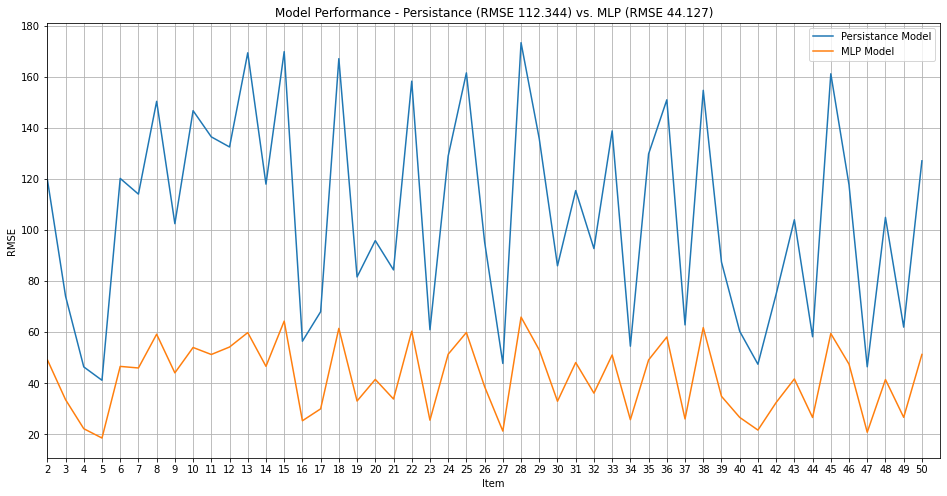

In [12]:
# plot item wise RMSE of Persiatace and MLP Models
fig, ax = plt.subplots(figsize=(16,8)) 
ax.plot(df_rmse_pers['item'],df_rmse_pers['rmse_pers'] , label='Persistance Model')
ax.plot(df_rmse_mlp['item'],df_rmse_mlp['rmse_mlp'] , label='MLP Model')
ax.set_xlabel('Item')
ax.set_ylabel('RMSE')
ax.set_title('Model Performance - Persistance (RMSE %0.3f) vs. MLP (RMSE %0.3f)' %(rmse_pers,rmse_mlp)) 
ax.legend()
ax.set_xlim(1,50)
ax.grid(True)

### Compare Test vs MLP Forecasts

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


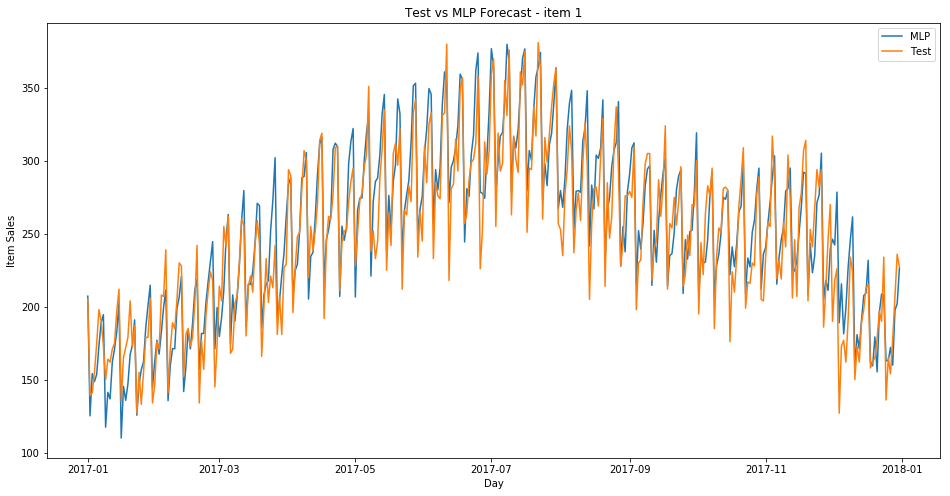

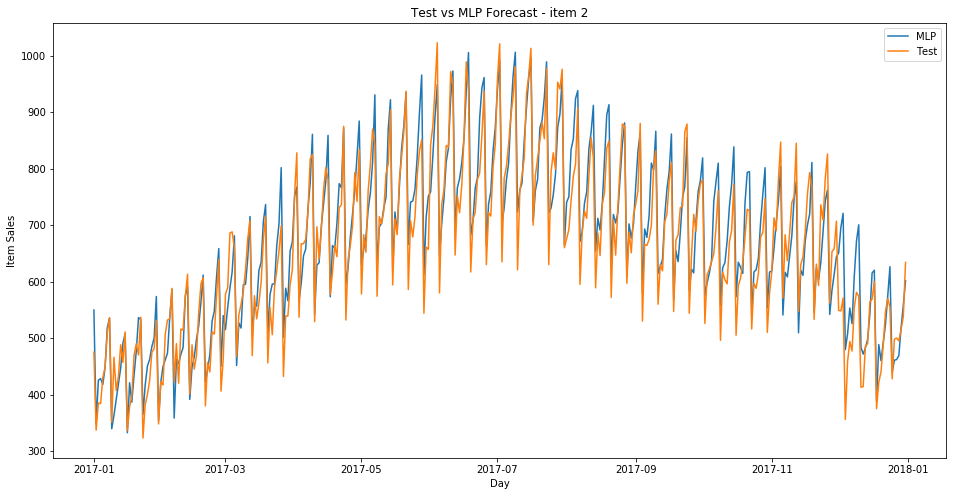

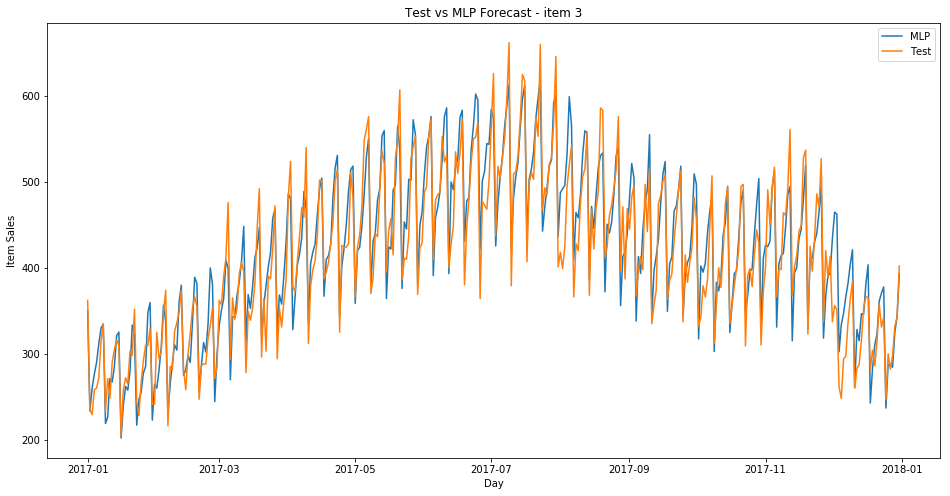

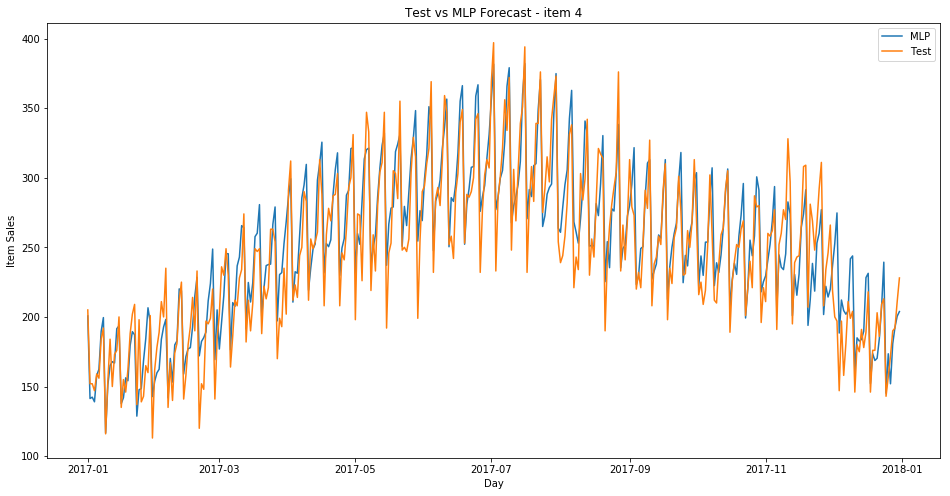

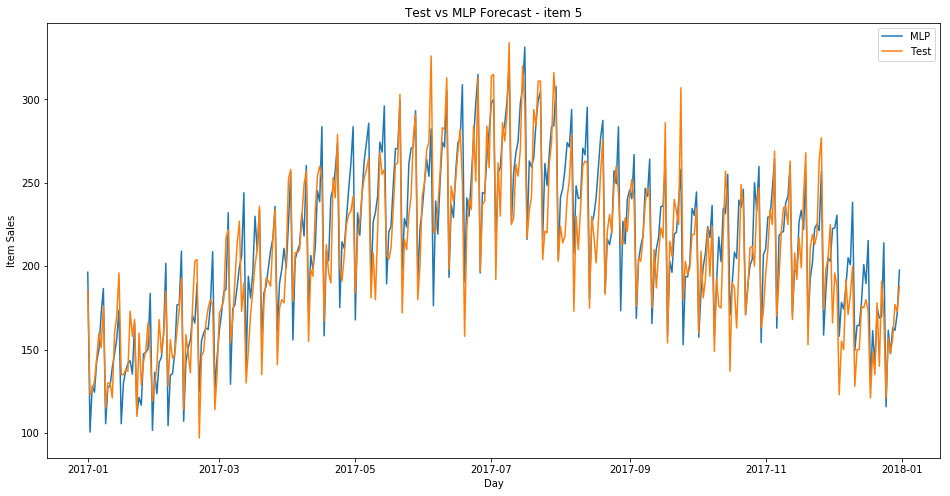

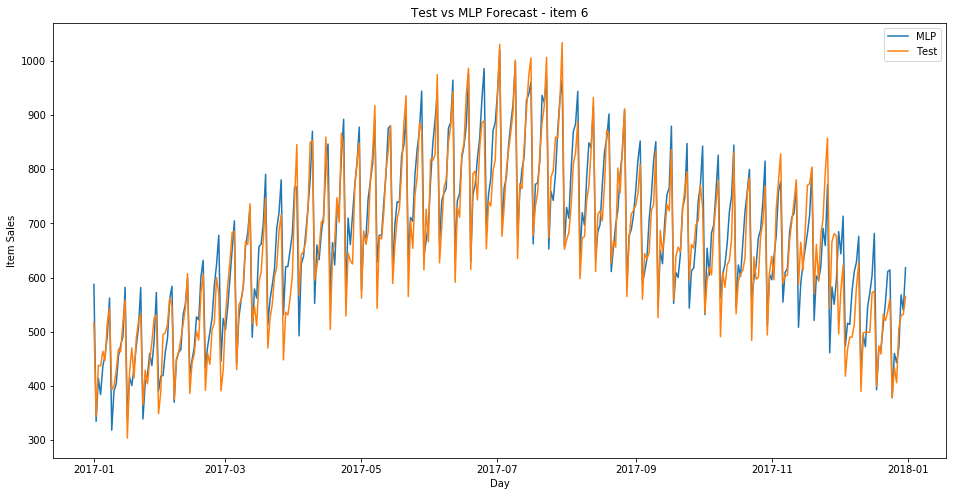

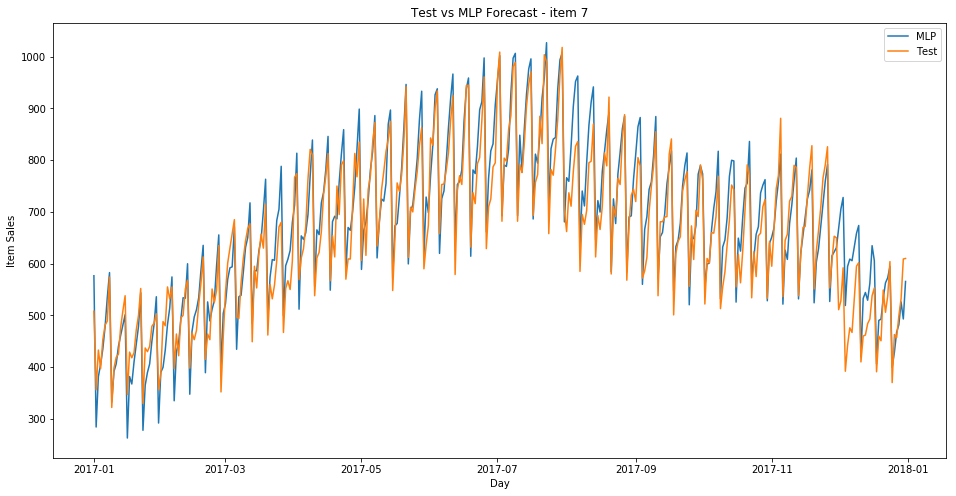

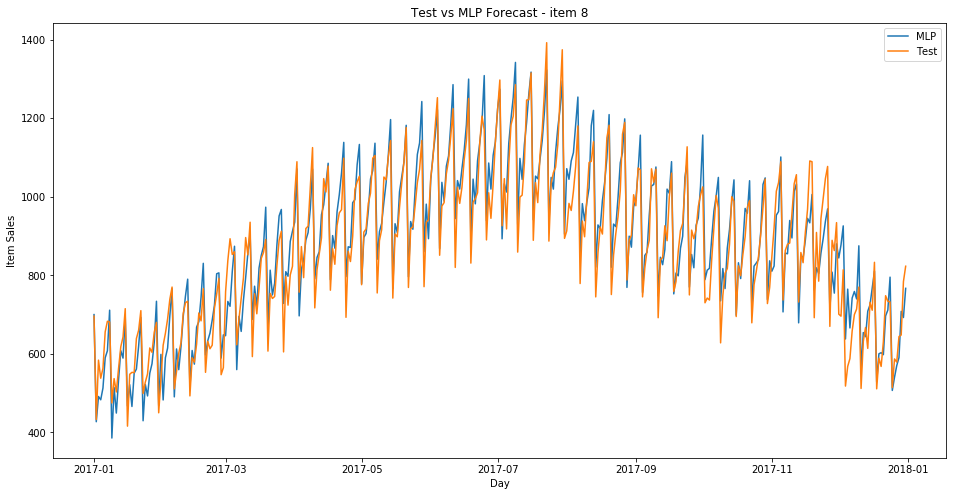

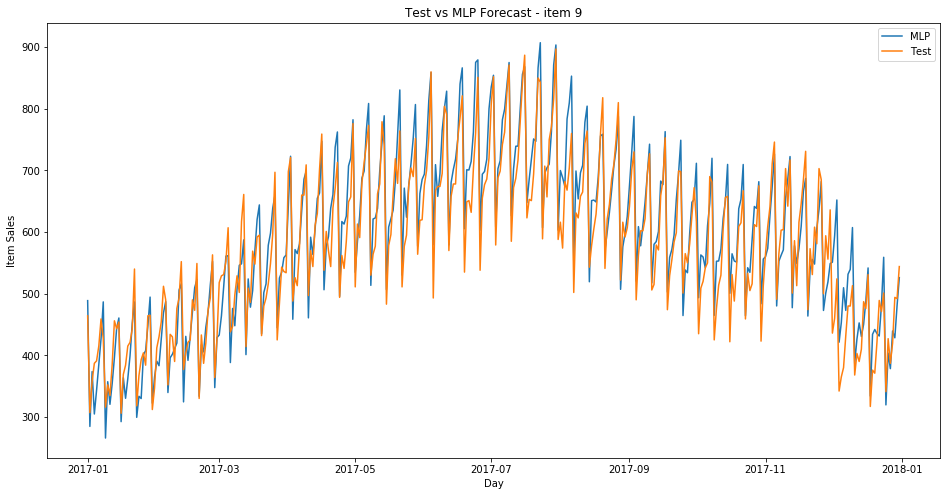

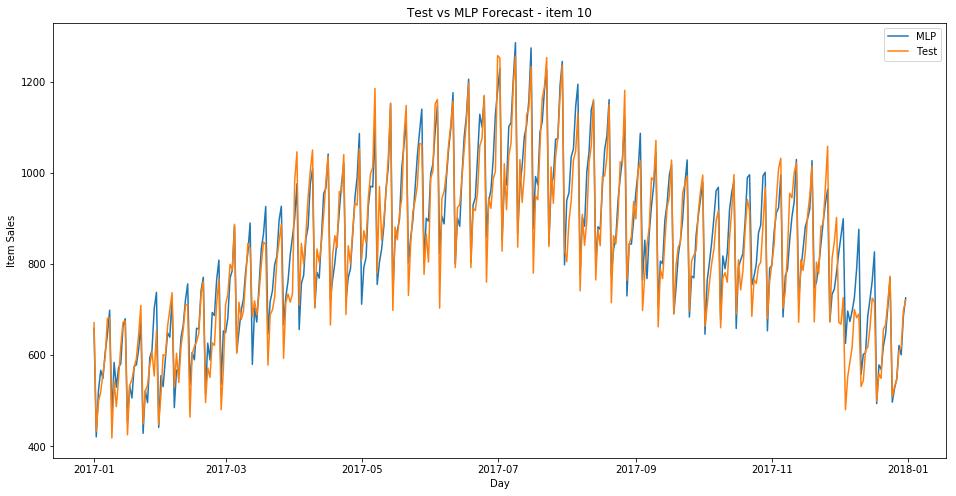

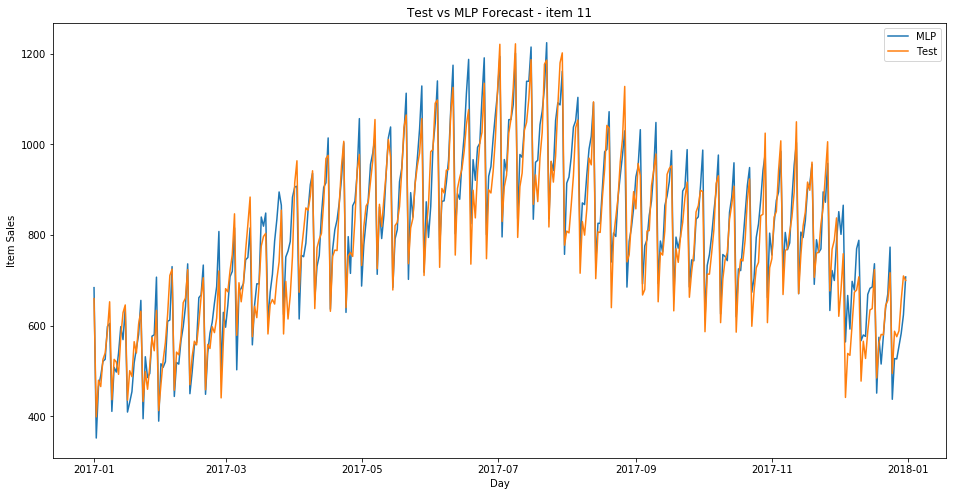

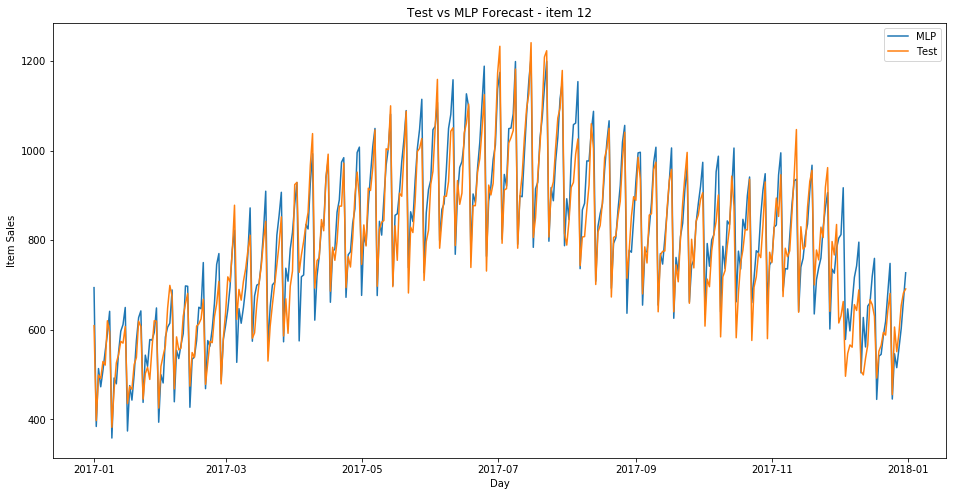

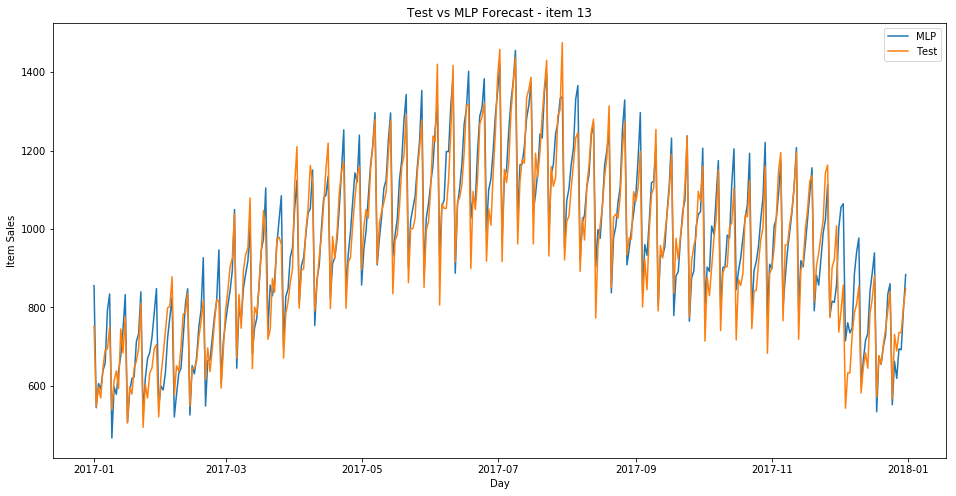

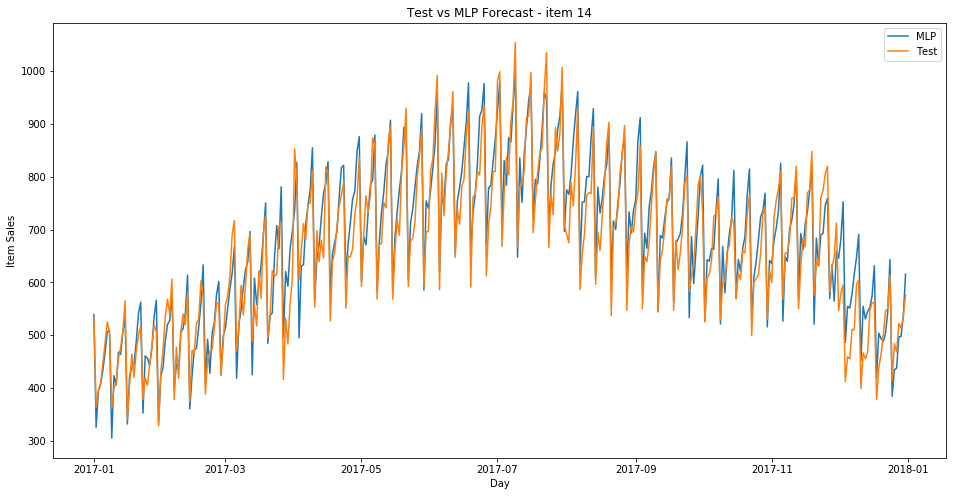

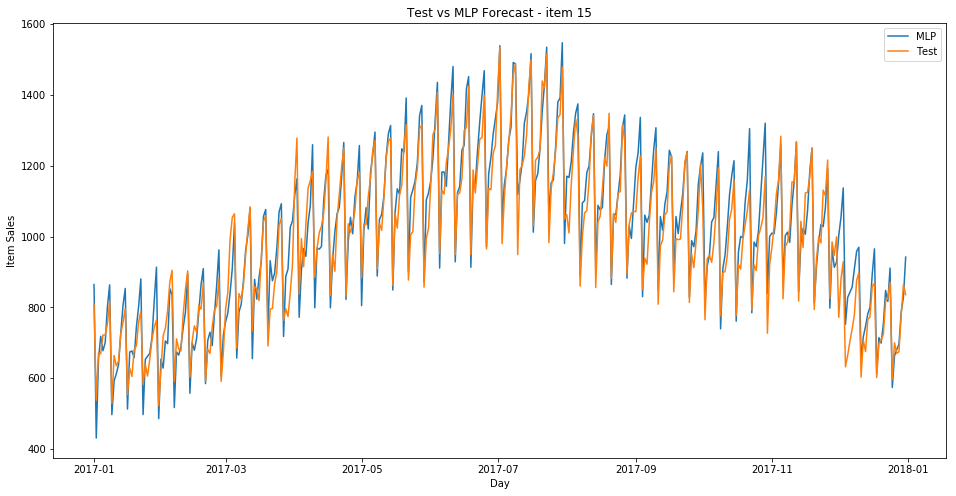

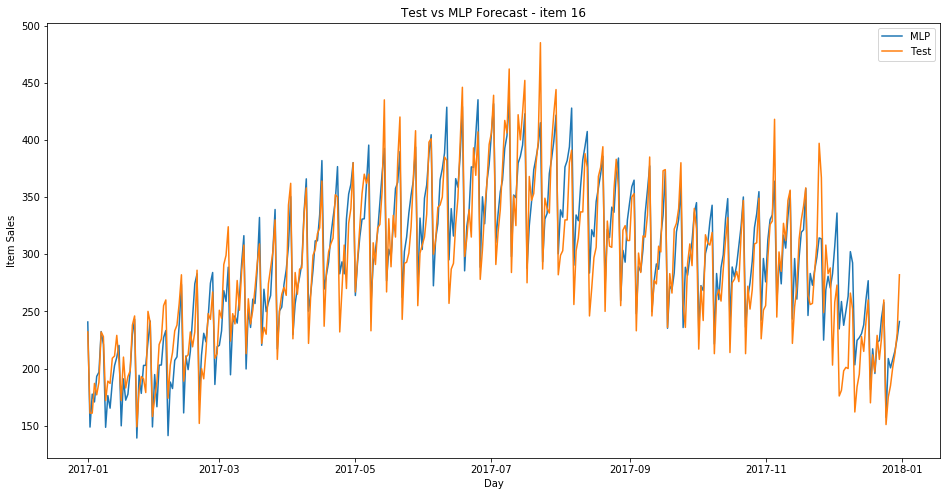

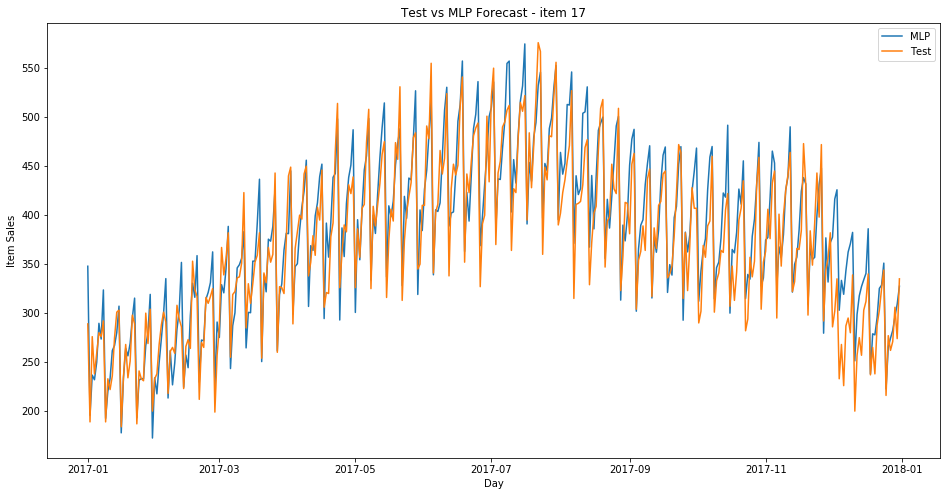

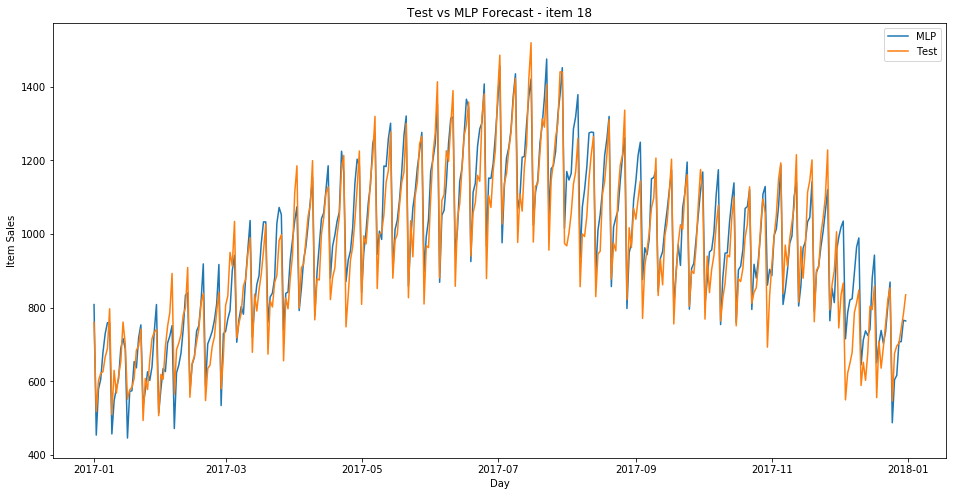

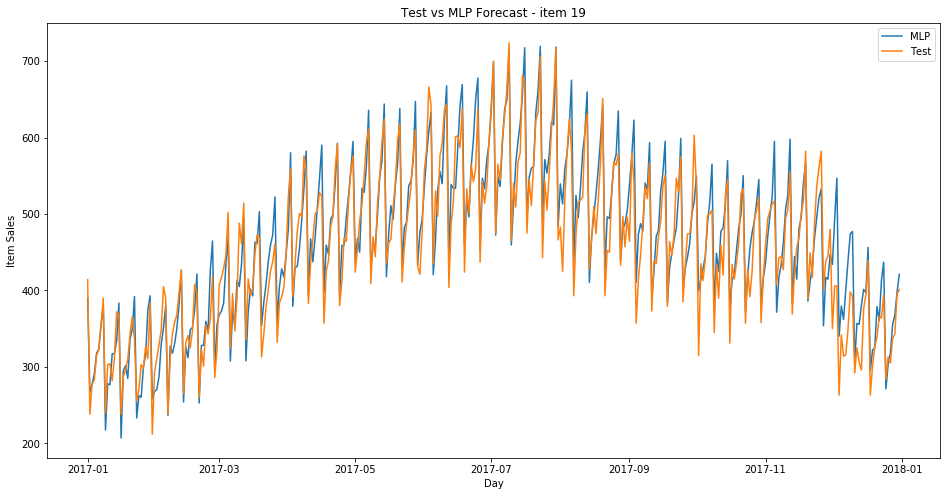

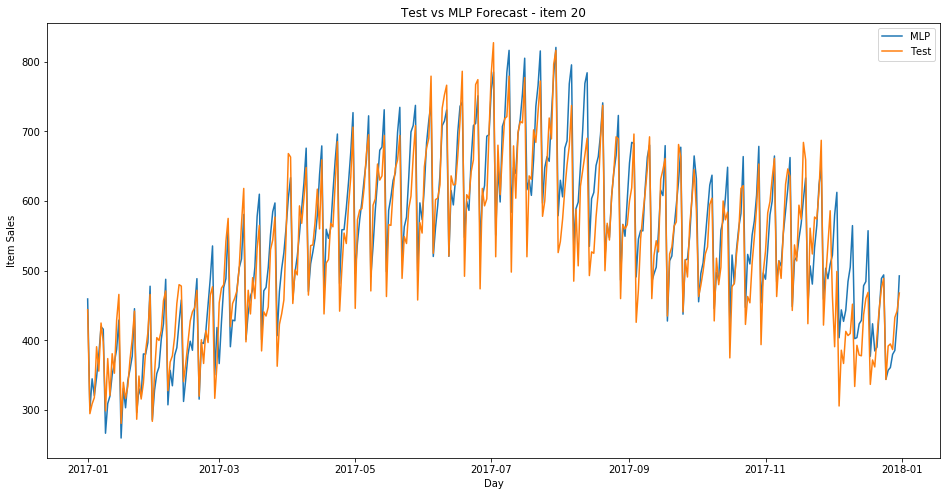

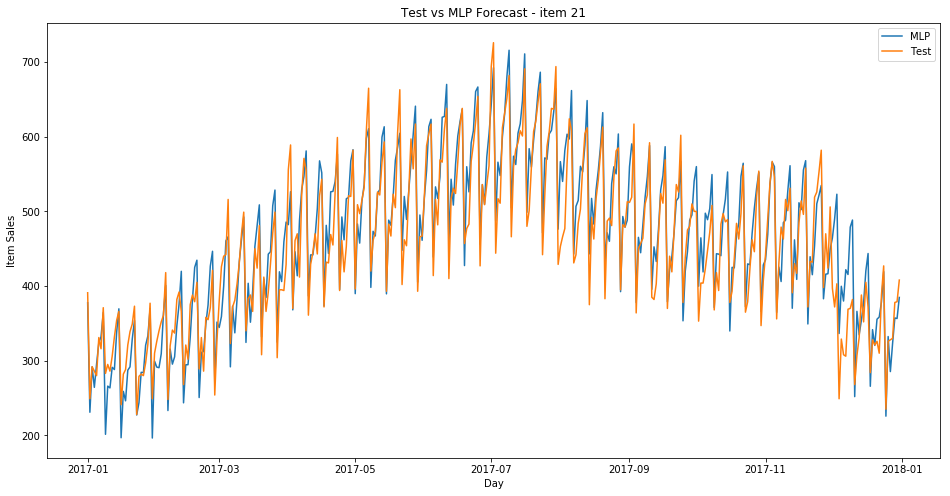

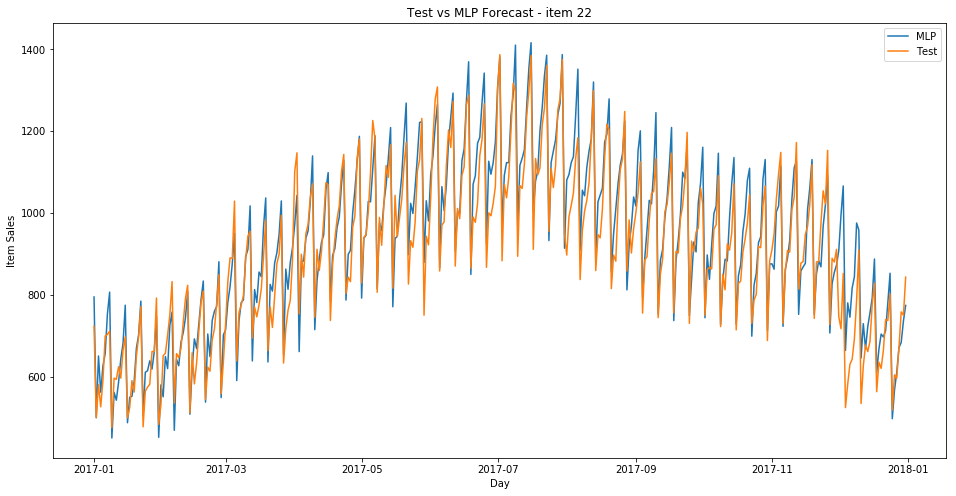

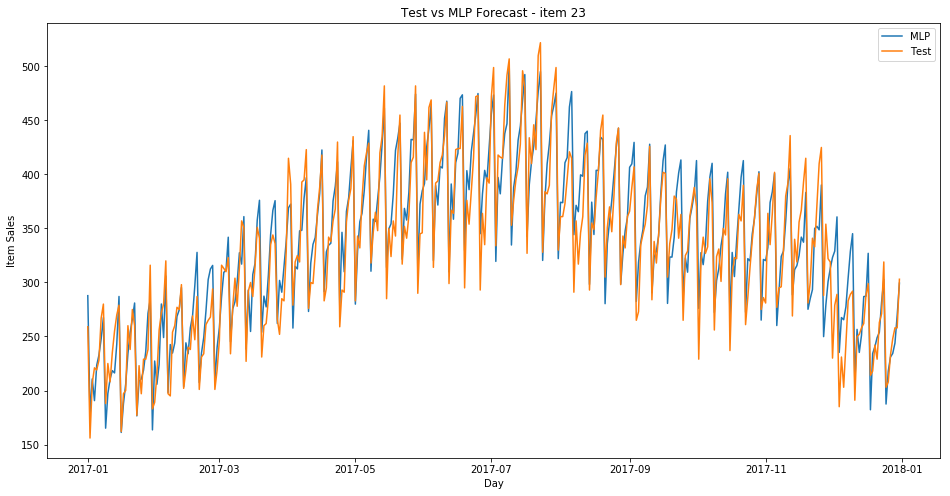

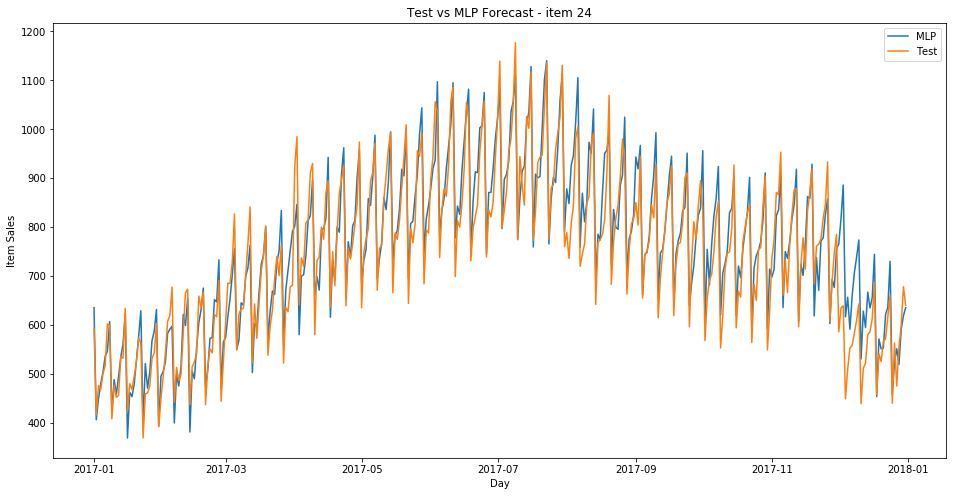

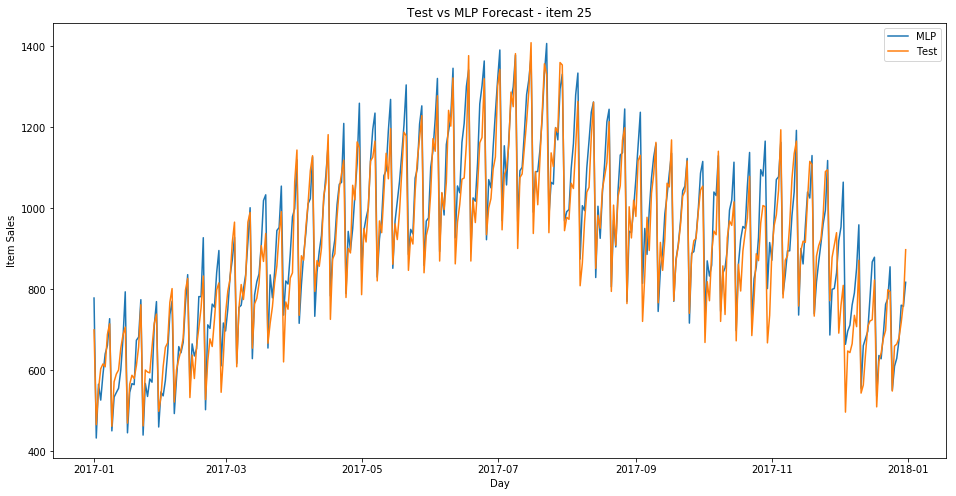

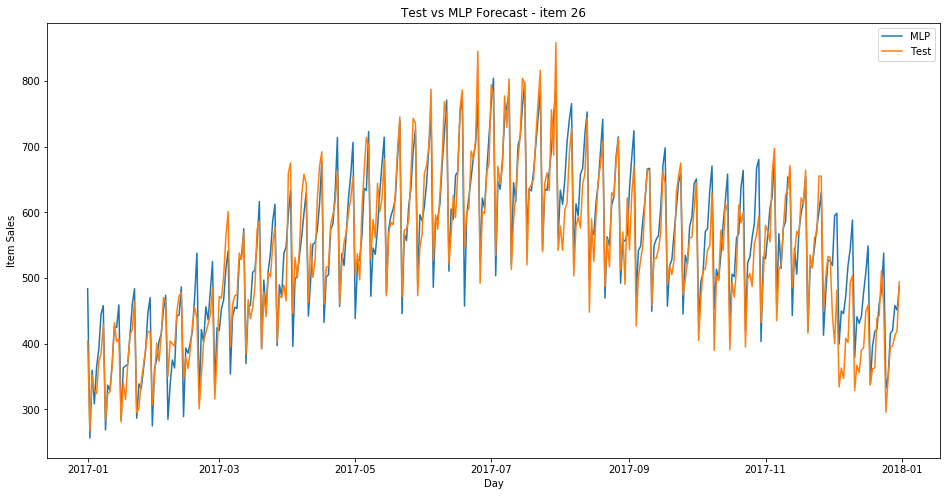

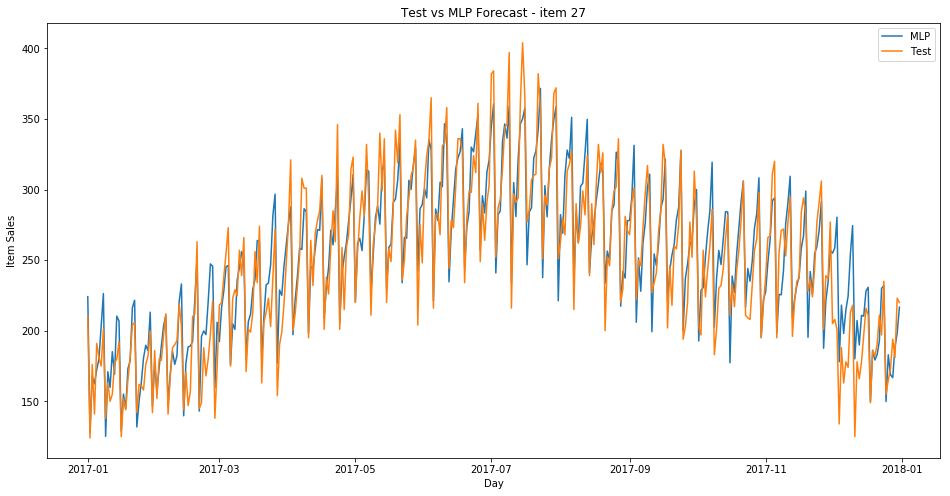

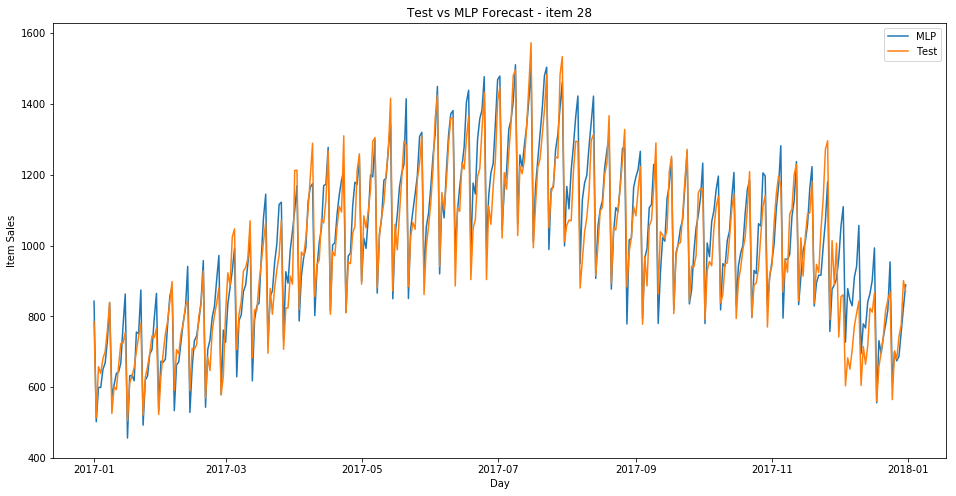

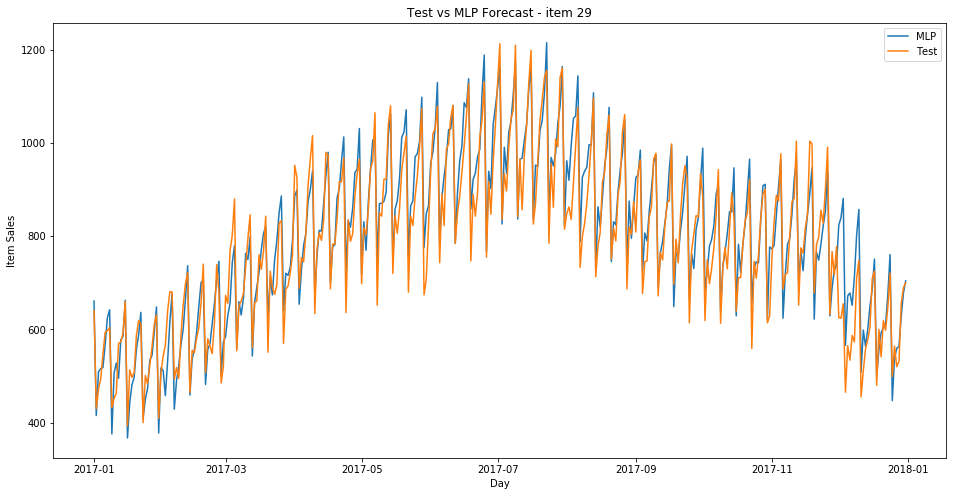

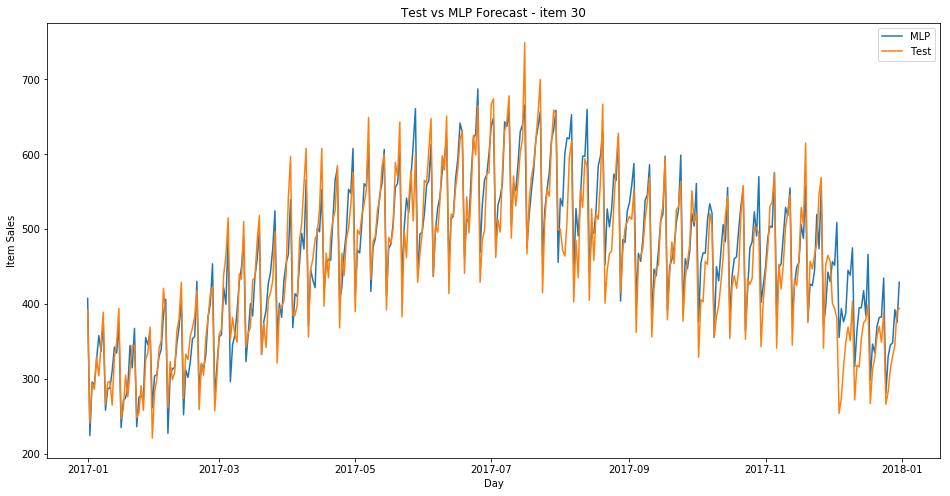

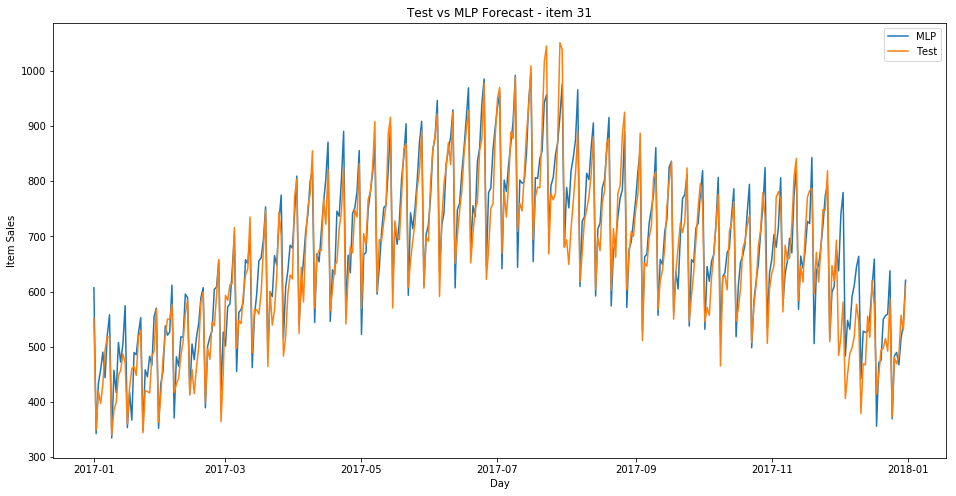

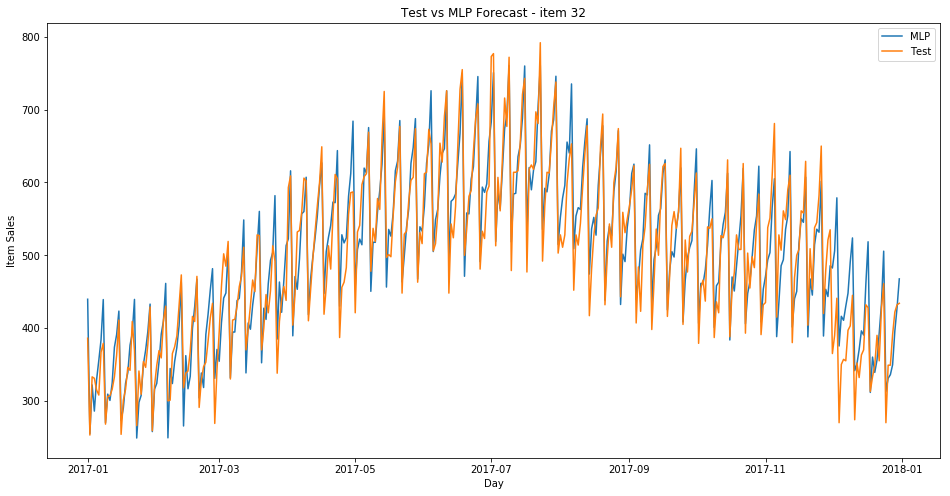

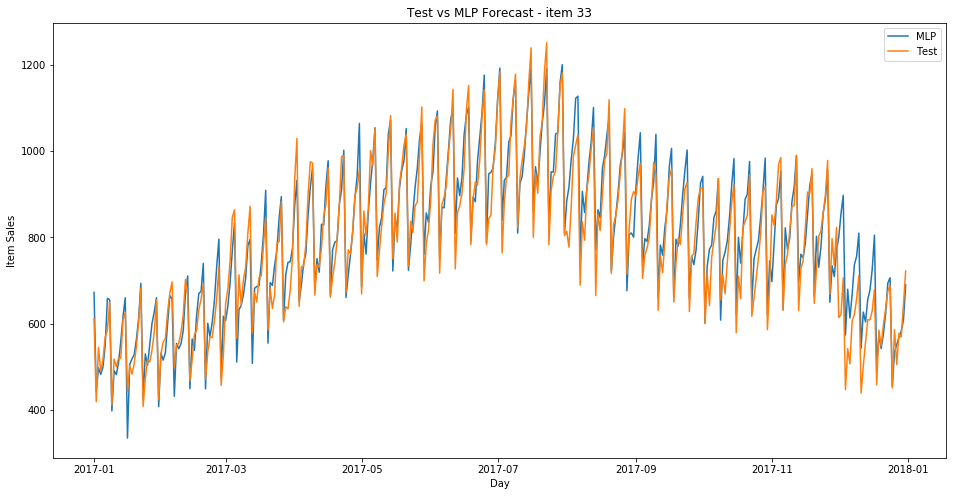

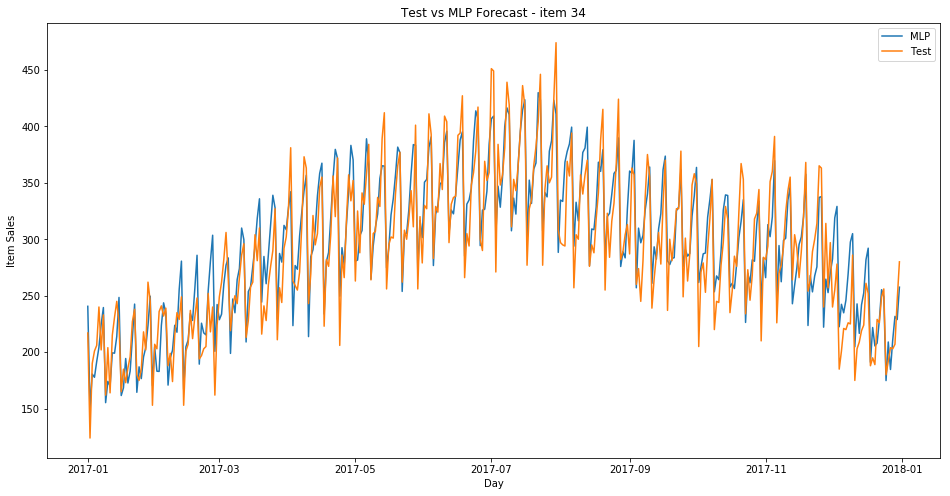

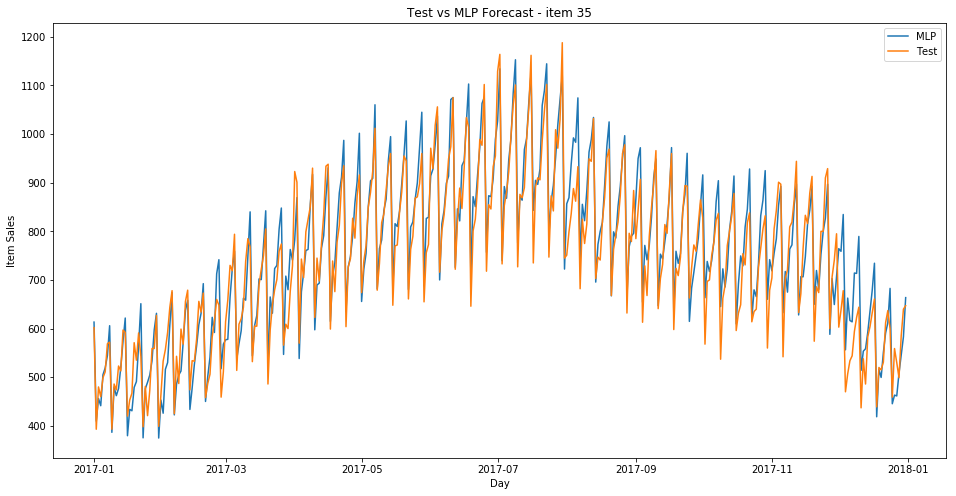

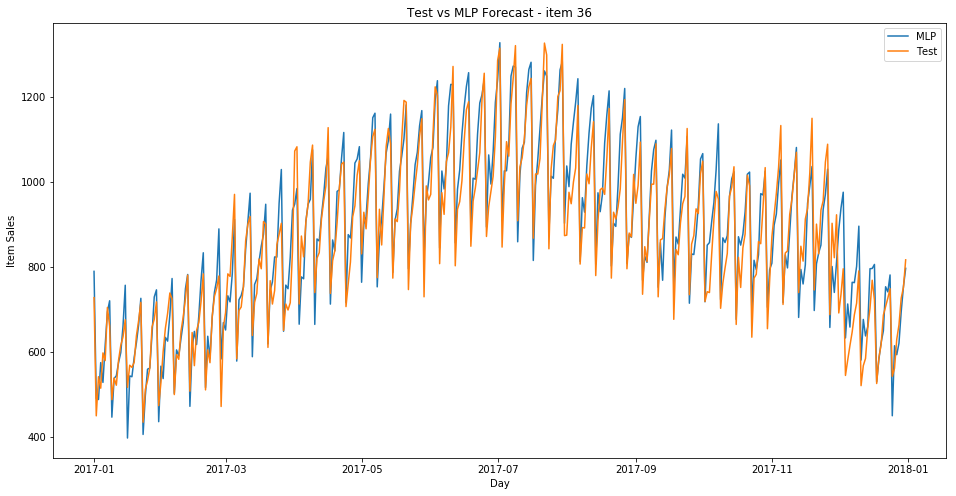

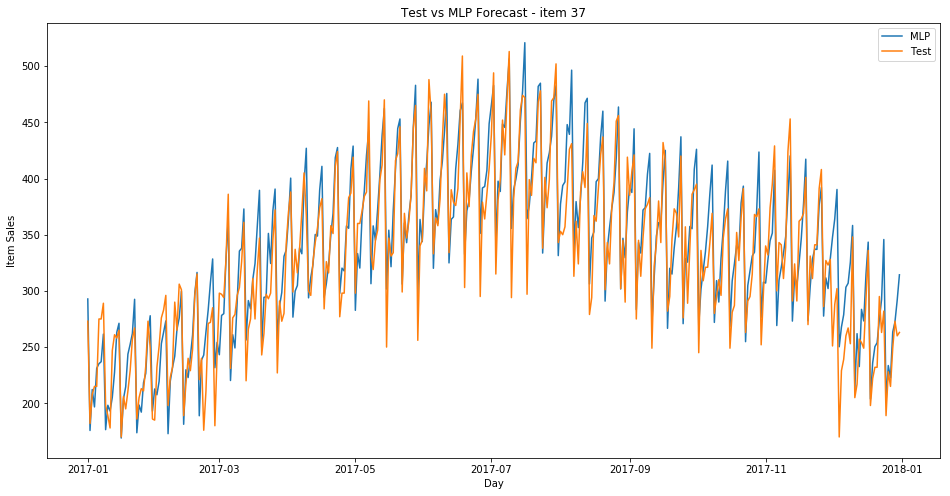

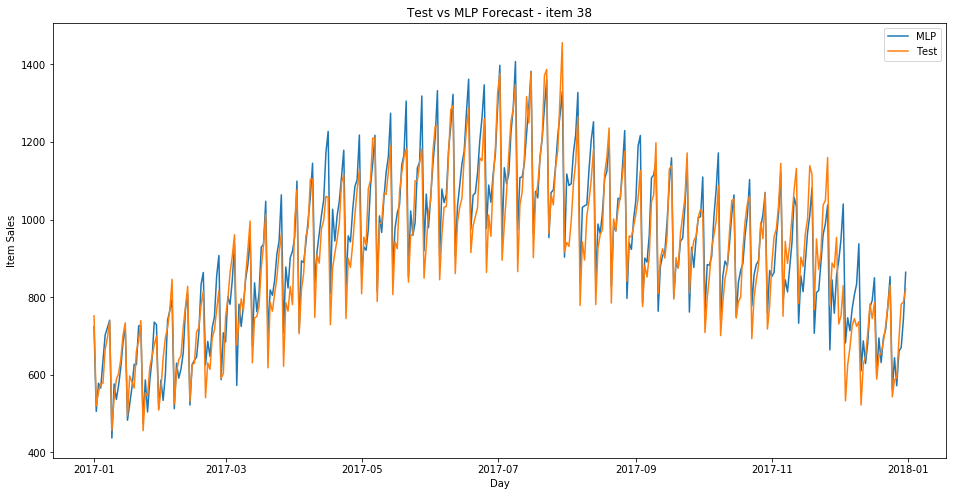

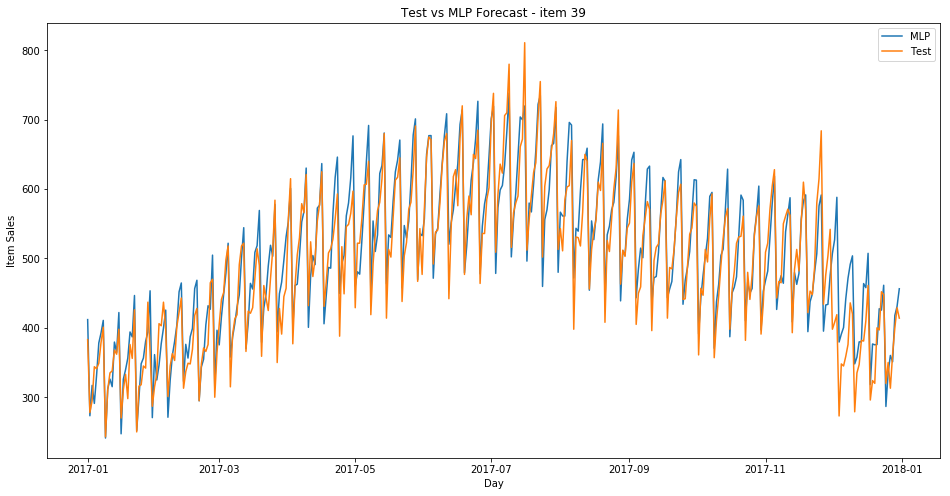

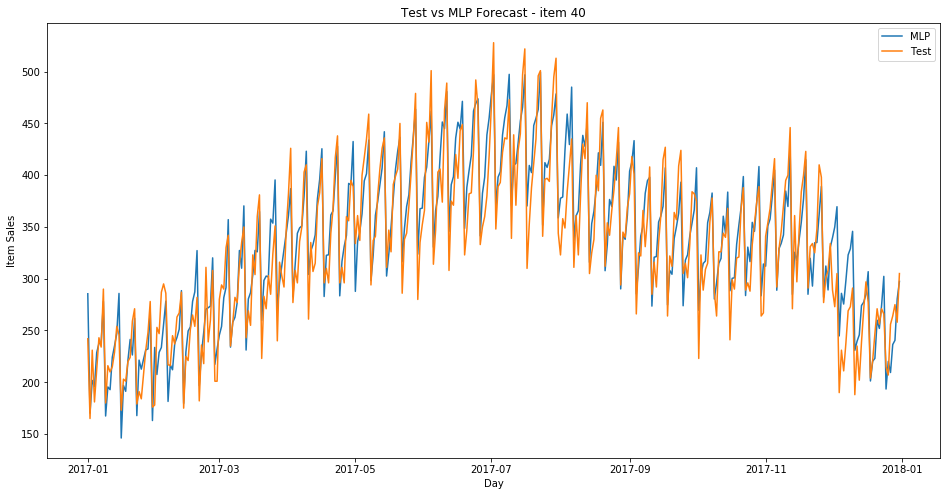

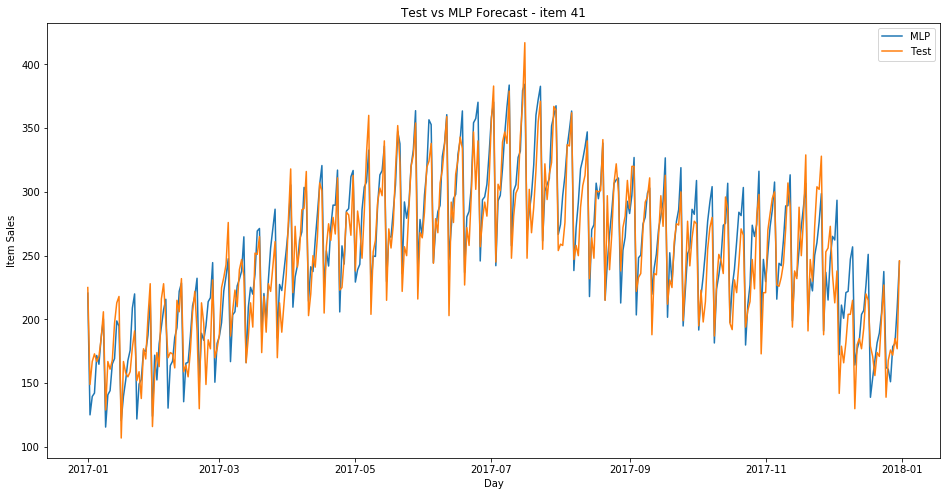

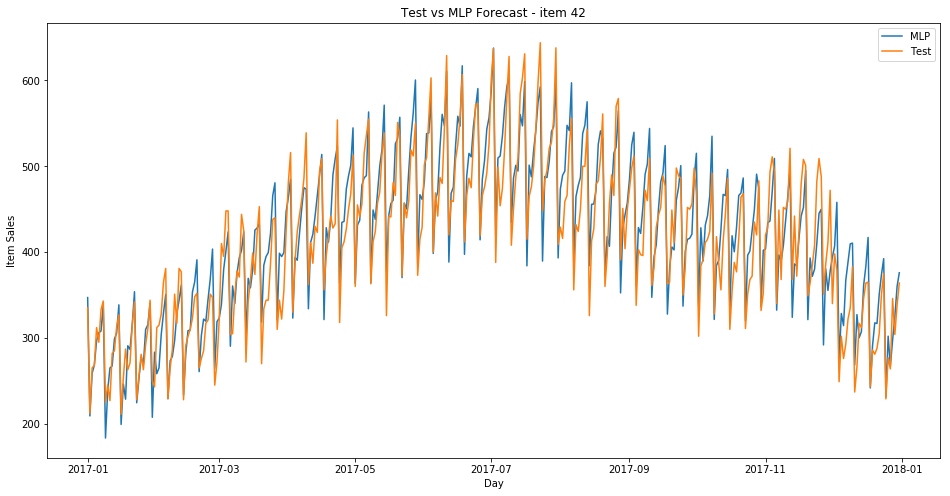

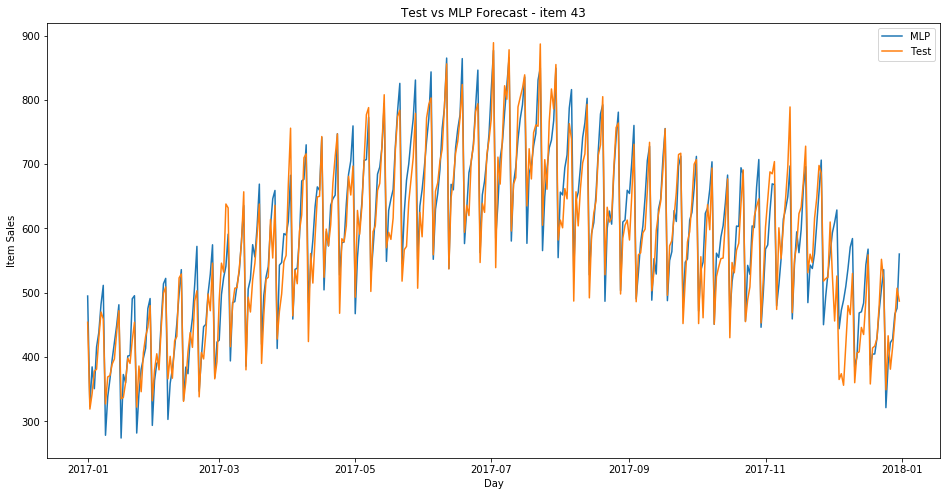

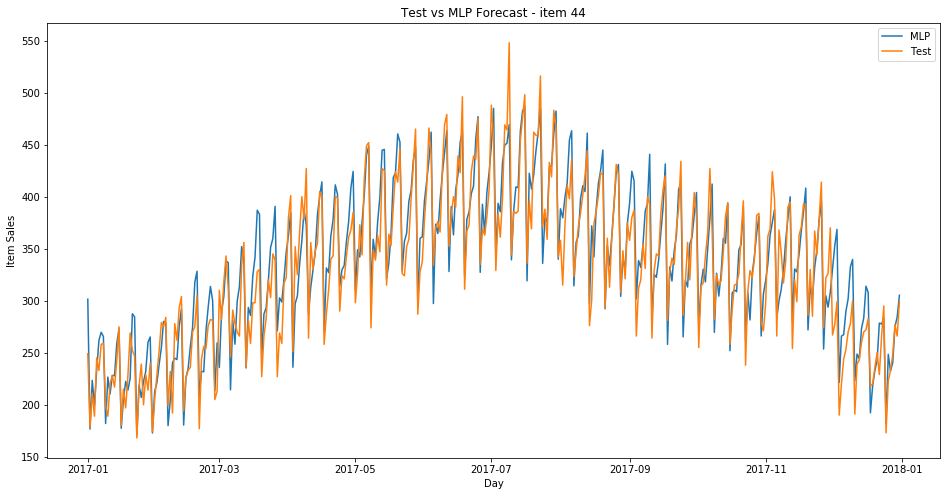

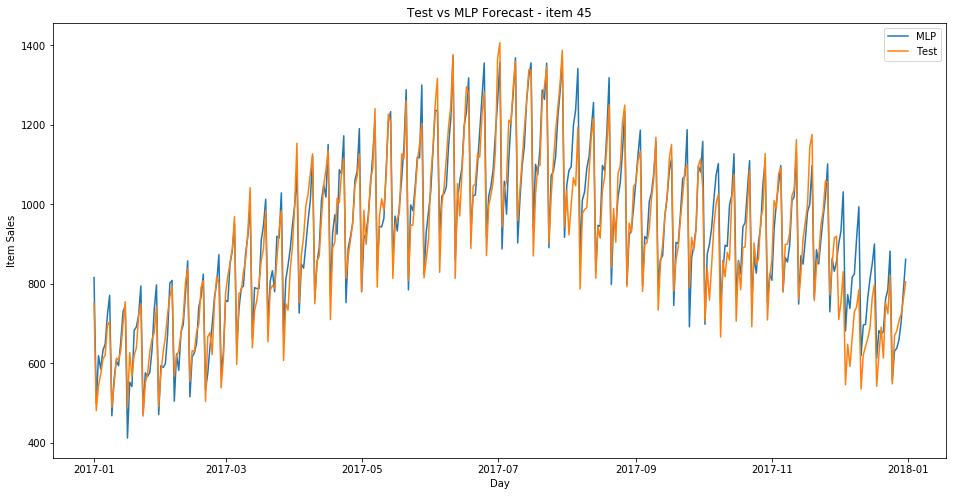

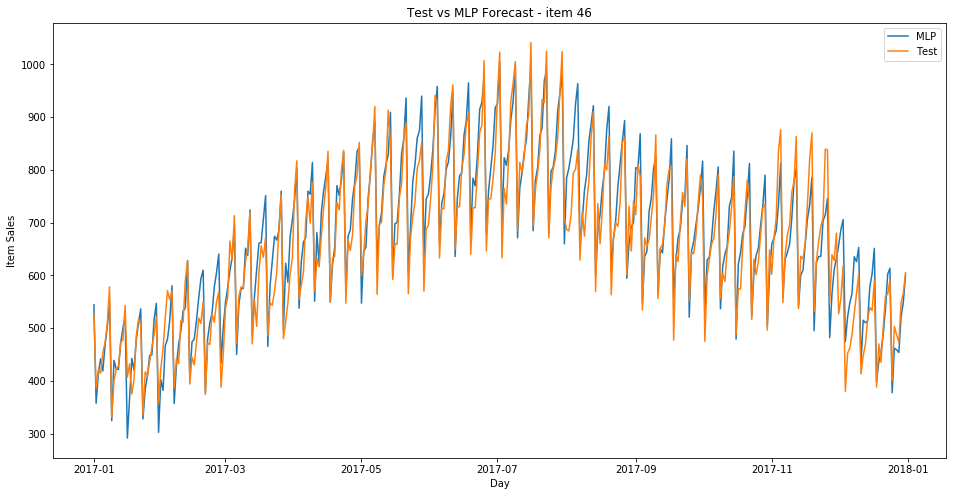

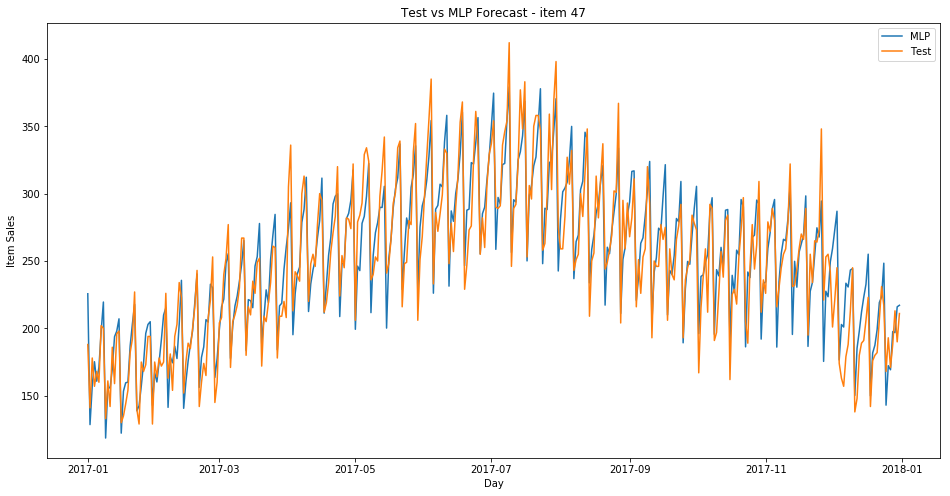

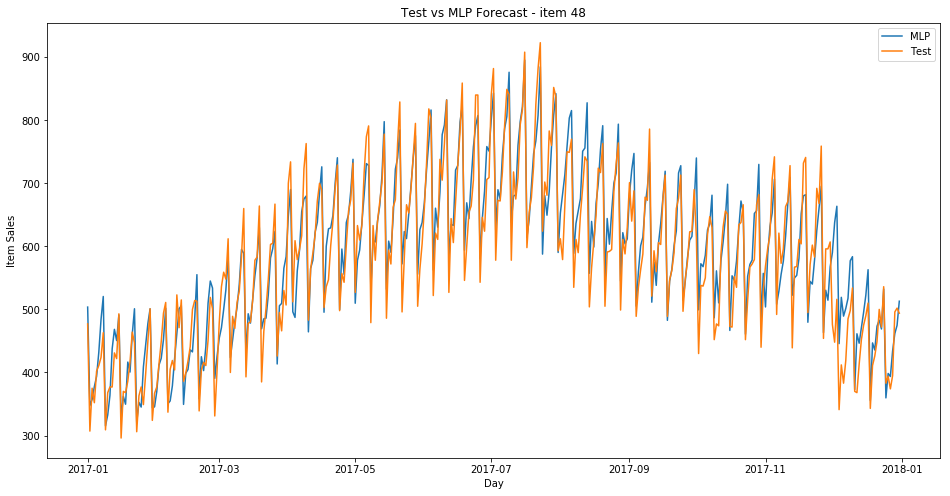

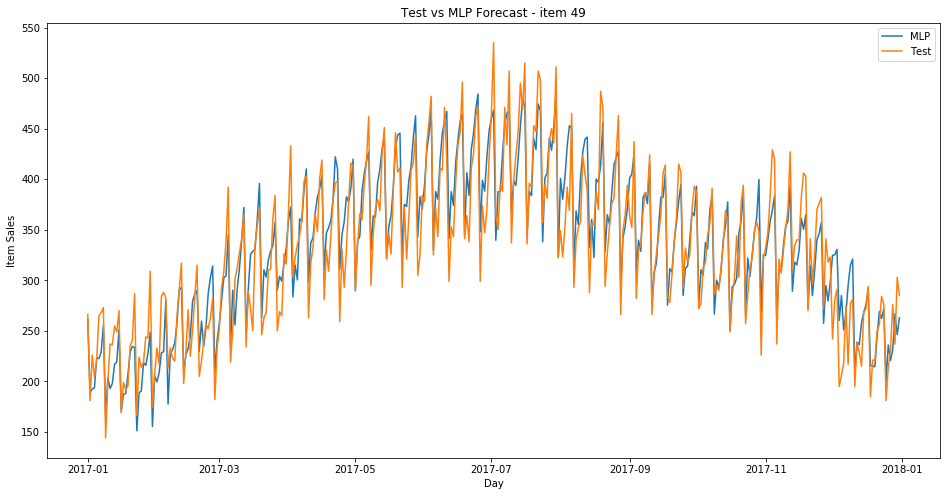

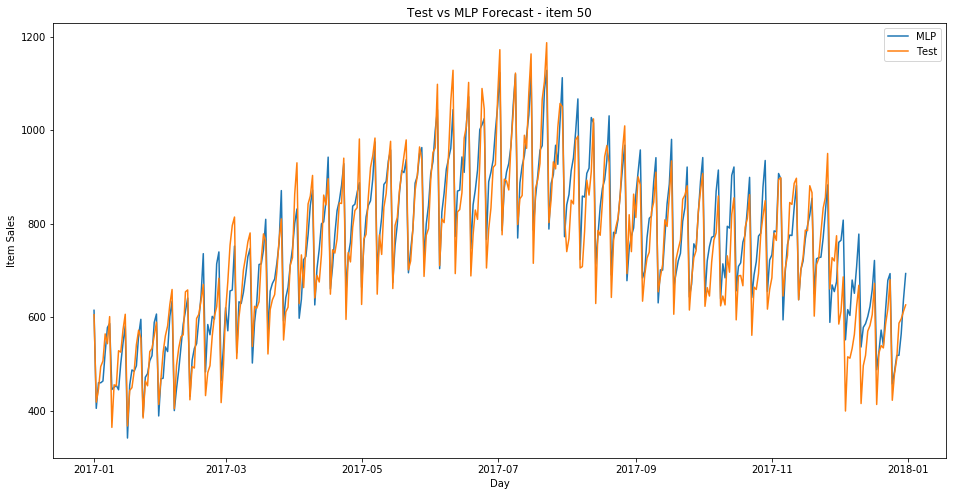

In [10]:
# compare forecasts of all items
df_pred_mlp.index = pd.to_datetime(df_pred_mlp.index)
test.index = pd.to_datetime(test.index)

for c in df_pred_mlp.columns:
    plt.figure(figsize=(16,8))
    plt.plot(df_pred_mlp[c], label='MLP')
    plt.plot(test[c], label='Test')
    plt.xlabel('Day')
    plt.ylabel('Item Sales')
    plt.legend()
    plt.title('Test vs MLP Forecast - item %s' %c)
    plt.plot()

##### The plots indicate that the predicted sales very closelt match the actual sales